In [108]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

/usr/local/Cellar/python/2.7.11/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
data = pd.read_csv("data.csv")

In [7]:
data

,Crash Number,Date Time,Day Of Week,Object 1,Object 2,Street Number,Steet Name,Cross Street,Location,Latitude,Longitude,Coordinates
0,24029,04/10/2010 09:39:00 AM,Saturday,Auto,Fixed Object,NaN,NaN,NaN,"& Cambridge, MA",NaN,NaN,NaN
1,24555,08/02/2010 11:55:00 PM,Monday,Auto,Auto,NaN,OXFORD AVE,NaN,"OXFORD AVE & Cambridge, MA",NaN,NaN,NaN
2,24967,10/23/2010 12:53:00 PM,Saturday,Taxi,Bicycle,NaN,NaN,NaN,"& Cambridge, MA",NaN,NaN,NaN
3,29404,07/16/2013 12:59:00 PM,Tuesday,Auto,Auto,NaN,FIRST ST,NaN,"FIRST ST & Cambridge, MA",NaN,NaN,NaN
4,23638,01/01/2010 01:50:00 AM,Friday,Auto,Auto,NaN,Massachusetts Ave,Rindge Ave,"Massachusetts Ave & Rindge Ave Cambridge, MA",42.392615,-71.124874,"(42.392615, -71.124874)"
5,23639,01/01/2010 02:04:00 AM,Friday,Taxi,Auto,NaN,Cambridge St,SCIARAPPA ST,"Cambridge St & SCIARAPPA ST Cambridge, MA",42.371233,-71.081493,"(42.371233, -71.081493)"
6,23640,01/01/2010 03:59:00 AM,Friday,Auto,Parked Vehicle,105,Coolidge Ave,NaN,"105 Coolidge Ave Cambridge, MA",42.368662,-71.141391,"(42.368662, -71.141391)"
7,23641,01/01/2010 08:49:00 AM,Friday,Auto,Parked Vehicle,NaN,Western Ave,HOWARD ST,"Western Ave & HOWARD ST Cambridge, MA",42.364749,-71.110774,"(42.364749, -71.110774)"
8,25270,01/01/2010 11:00:00 AM,Saturday,Auto,Parked Vehicle,350,MAIN ST,NaN,"350 MAIN ST Cambridge, MA",42.362388,-71.087276,"(42.362388, -71.087276)"
9,23642,01/02/2010 07:31:00 AM,Saturday,Truck,Fixed Object,NaN,MAGAZINE ST,PRINCE ST,"MAGAZINE ST & PRINCE ST Cambridge, MA",42.360270,-71.109809,"(42.36027, -71.109809)"


In [25]:
data = data[np.isfinite(data['Latitude'])]

In [27]:
data = data[np.isfinite(data['Longitude'])]

In [62]:
bikes = data[(data['Object 1'] == "Bicycle") | (data['Object 2'] == "Bicycle")][['Latitude', 'Longitude']]
nobikes = data[(data['Object 1'] != "Bicycle") & (data['Object 2'] != "Bicycle")][['Latitude', 'Longitude']]

In [83]:
latitudeRange = data.Latitude.max() - data.Latitude.min()
longitudeRange = data.Longitude.max() - data.Longitude.min()
latitudeMin = data.Latitude.min()
longitudeMin = data.Longitude.min()

In [284]:
binSize = 0.0001

In [285]:
bikeGrid = np.zeros((math.ceil(latitudeRange / binSize), math.ceil(longitudeRange / binSize)))
noBikeGrid = np.zeros((math.ceil(latitudeRange / binSize), math.ceil(longitudeRange / binSize)))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [286]:
for index, row in bikes.iterrows(): 
    latDiff = row.Latitude - latitudeMin
    longDiff = row.Longitude - longitudeMin
    latBin = latDiff / binSize
    longBin = longDiff / binSize
    bikeGrid[math.floor(latBin)][math.floor(longBin)] += 1
for index, row in nobikes.iterrows(): 
    latDiff = row.Latitude - latitudeMin
    longDiff = row.Longitude - longitudeMin
    latBin = latDiff / binSize
    longBin = longDiff / binSize
    noBikeGrid[math.floor(latBin)][math.floor(longBin)] += 1

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [302]:
a, b, c = plt.hist(noBikeGrid.reshape(bikeGrid.size), 101, normed=1, color='blue')


In [303]:
plt.yscale('log')

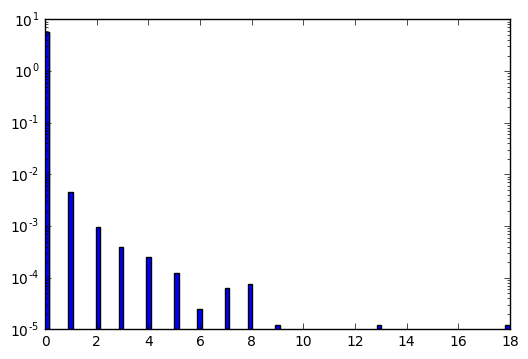

In [304]:
plt.show()


In [178]:
latBin

41.246249999726814

In [179]:
longBin

160.28750000025127

In [180]:
bikeGrid[41][160]

16.0

In [196]:
noBikeGrid.max()

58.0

In [208]:
numpy.savetxt("test_grid2.csv", bikeGrid - noBikeGrid, delimiter=",")

In [158]:
bikeDf.to_csv("test.csv")

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'